In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Destribution of 2123's year:  [0.95238095 0.04761905]
Destribution of 2040's year:  [0.82709831 0.17290169]


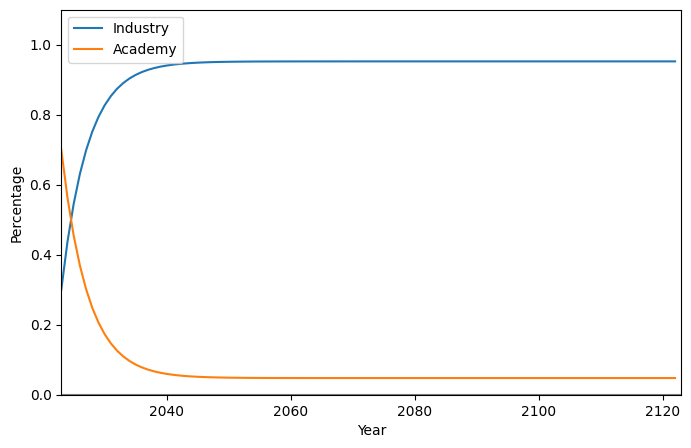

In [14]:
# 1 Task

T = np.array([[0.99, 0.2],
              [0.01, 0.8]])


def gen_observations(x0):
  x_p = x0
  observations = [x0]
  for i in range(99):
    x = T@x_p
    observations.append(x)
    x_p = x
  return np.array(observations)


# 1.1

x0_3_7 = np.array([0.3, 0.7]).T
observations_3_7 = gen_observations(x0_3_7)

print('Destribution of 2123\'s year: ', observations_3_7[-1])
print('Destribution of 2040\'s year: ', observations_3_7[7])


plt.figure(figsize=(8,5))

plt.plot(np.arange(2023, 2023 + observations_3_7.shape[0]), observations_3_7[:, 0], label = 'Industry')
plt.plot(np.arange(2023, 2023 + observations_3_7.shape[0]), observations_3_7[:, 1], label = 'Academy')

plt.axvline(x = 0, color = 'grey')
plt.axhline(y = 0, color = 'grey')

_ = plt.xlim((2023, 2123))
_ = plt.ylim((0, 1.1))

_ = plt.legend()
_ = plt.xlabel('Year')
_ = plt.ylabel('Percentage')

We can see, that number of researcher is increasing very fast first few years and slows down near 2040's year, where more than 82% researchers are in industry and only 17% of researchers are in academia. After around 2060's year destribution of researchers almost not changing. Also we can see, that sum of fractions of industry researchers and academia researchers is always 1, wich is reasonable, because overall number of researchers does not change.

Destribution of 2123's year:  [0.95238095 0.04761905]


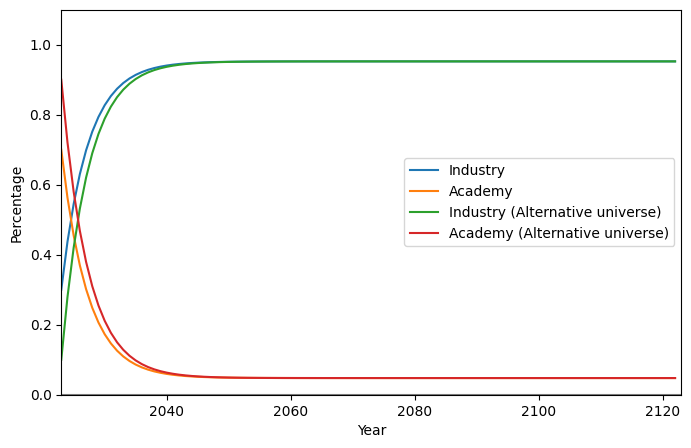

In [15]:
# 1.2

x0_1_9 = np.array([0.1, 0.9]).T
observations_1_9 = gen_observations(x0_1_9)

print('Destribution of 2123\'s year: ', observations_1_9[-1])
print('Destribution of 2040\'s year: ', observations_1_9[7])

plt.figure(figsize=(8,5))

plt.plot(np.arange(2023, 2023 + observations_3_7.shape[0]), observations_3_7[:, 0], label = 'Industry')
plt.plot(np.arange(2023, 2023 + observations_3_7.shape[0]), observations_3_7[:, 1], label = 'Academy')
plt.plot(np.arange(2023, 2023 + observations_1_9.shape[0]), observations_1_9[:, 0], label = 'Industry (Alternative universe)')
plt.plot(np.arange(2023, 2023 + observations_1_9.shape[0]), observations_1_9[:, 1], label = 'Academy (Alternative universe)')

plt.axvline(x = 0, color = 'grey')
plt.axhline(y = 0, color = 'grey')

_ = plt.xlim((2023, 2123))
_ = plt.ylim((0, 1.1))

_ = plt.legend()
_ = plt.xlabel('Year')
_ = plt.ylabel('Percentage')

Here we can see, that starting destribution does not affect the final destribution for large year range, in our case - 100 years. The difference is so small, that it can be ignored. Destributions with starting weights (0.1, 0.9) and (0.3, 0.7) start to align around 2040's year.

In [27]:
# 1.3

l, v = np.linalg.eig(T)
print('Eigenvalues: ', l)
print('Corresponding eigenvectors:\n', v)

Eigenvalues:  [1.   0.79]
Corresponding eigenvectors:
 [[ 0.99875234 -0.70710678]
 [ 0.04993762  0.70710678]]


Eigenvalue 1 means, that sum of industry and academy fractions will always be 1. In other words, the transformation doesn't increase total number of researchers. Eigenvector corresponding to eigenvalue 1 is [0.04993762, 0.99875234]. This vector indicates maximum proportion of researchers in our destribution over years (maximum stretching of our vector). Maximum proportion ratio of industry researchers to academic researchers is 20 to 1. We can see it on our distribution data:

In [31]:
np.isclose(observations_1_9[-1][0], observations_1_9[-1][1] * 20)

True